2025-10-27 19:14:12,014 - INFO - --- РОЗПОЧАТОК СКРИПТУ ОПТИМІЗАЦІЇ LIGHTGBM (З ПЕРЕВІРКОЮ) ---
2025-10-27 19:14:12,030 - INFO - Дані успішно завантажено з C:\Databases\charge_database_alt.sqlite
2025-10-27 19:14:12,031 - INFO - Об'єднання таблиць...
2025-10-27 19:14:12,041 - INFO - Дані відсортовано за 'charging_start_time'.
2025-10-27 19:14:12,042 - INFO - Підготовка фінальних X (ознак) та Y (цілі)...
2025-10-27 19:14:12,045 - INFO - Створено цільову змінну. Класи: ['DC Fast Charger', 'Level 1', 'Level 2']
2025-10-27 19:14:12,048 - INFO - Дані розділено на Train (1056 рядків) та Test (264 рядків) за часом.
2025-10-27 19:14:12,049 - INFO - --- Оцінка моделі LightGBM 'До' оптимізації (за замовчуванням) ---
2025-10-27 19:14:12,190 - INFO - [Default Model] Train F1-weighted: 0.9981
2025-10-27 19:14:12,191 - INFO - [Default Model] Test F1-weighted:  0.3231  <--- ЦЕ НАШ БАЗОВИЙ РЕЗУЛЬТАТ
2025-10-27 19:14:12,192 - INFO - Запис метрик для 'LightGBM_Default' в БД...
2025-10-27 19:14:12,204 - 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 1056, number of used features: 8
[LightGBM] [Info] Start training from score -1.101457
[LightGBM] [Info] Start training from score -1.090126
[LightGBM] [Info] Start training from score -1.104310


C:\Users\dacko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 1056, number of used features: 8
[LightGBM] [Info] Start training from score -1.101457
[LightGBM] [Info] Start training from score -1.090126
[LightGBM] [Info] Start training from score -1.104310


2025-10-27 19:14:54,066 - INFO - Оптимізацію завершено.
2025-10-27 19:14:54,067 - INFO - --- Оцінка моделі LightGBM 'Після' оптимізації ---
2025-10-27 19:14:54,103 - INFO - [Optimized Model] Train F1-weighted: 0.8078
2025-10-27 19:14:54,104 - INFO - [Optimized Model] Test F1-weighted:  0.2971
2025-10-27 19:14:54,104 - INFO - Запис метрик для 'LightGBM_Optimized' в БД...
2025-10-27 19:14:54,129 - INFO - Метрики для 'LightGBM_Optimized' успішно збережено в model_metrics.
2025-10-27 19:14:54,130 - INFO - --- Фінальне Порівняння та Збереження ---
2025-10-27 19:14:54,132 - WARNING - РЕЗУЛЬТАТ: Модель за замовчуванням (Default) показала кращий F1-score.
2025-10-27 19:14:54,132 - WARNING - Зберігаємо модель за замовчуванням як фінальну.
2025-10-27 19:14:54,145 - INFO - Найкращу модель ('LightGBM_Default (Saved as Optimized)') збережено в C:\Data\models\lightgbm_optimized.joblib
2025-10-27 19:14:54,148 - INFO - Відображення фінальної матриці помилок для моделі, яку було збережено...



             РЕЗУЛЬТАТИ ОПТИМІЗАЦІЇ LIGHTGBM

--- Найкращі Гіперпараметри (з пошуку RandomizedSearch) ---
{
    "subsample": 1.0,
    "reg_lambda": 0.0,
    "reg_alpha": 1.0,
    "num_leaves": 31,
    "n_estimators": 200,
    "max_depth": -1,
    "learning_rate": 0.01,
    "colsample_bytree": 0.8
}

--- Порівняння Метрик на Тестових Даних (Test Set) ---
                       | Default Model   | Optimized Model
-----------------------|-----------------|-----------------
Test F1-Weighted       | 0.3231          | 0.2971         
Test Accuracy          | 0.3220          | 0.2955         

 ФІНАЛЬНА МОДЕЛЬ (ЗБЕРЕЖЕНА): LightGBM_Default (Saved as Optimized)
 Її F1-Score на Тесті: 0.3231

--- Метрики Фінальної Збереженої Моделі (Test Set) ---
Accuracy:  0.3220
F1-score (weighted): 0.3231
Precision (weighted): 0.3297
Recall (weighted): 0.3220




2025-10-27 19:14:54,348 - INFO - Матрицю помилок збережено в C:\Data\logs\confusion_matrix_final_lightgbm_default_(saved_as_optimized).png


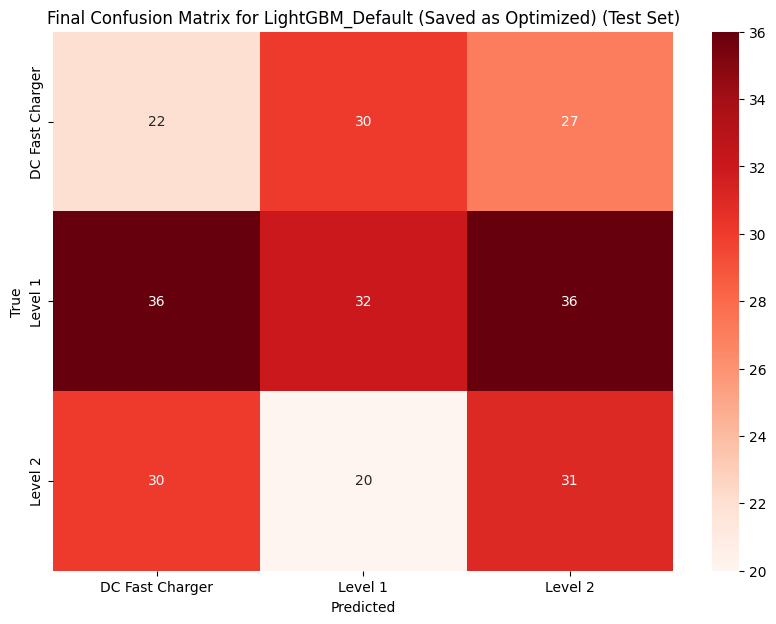

2025-10-27 19:14:54,415 - INFO - --- СКРИПТ ОПТИМІЗАЦІЇ УСПІШНО ЗАВЕРШЕНО ---


In [1]:
import pandas as pd
import numpy as np
import sqlite3
import joblib
import os
import json
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
)

# --- Налаштування шляхів для збереження ---
MODELS_DIR = 'C:\\Data\\models'
LOGS_DIR = 'C:\\Data\\logs'
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(LOGS_DIR, exist_ok=True)

# --- Налаштування логування ---
log_file = os.path.join(LOGS_DIR, 'optimization_logs.log')
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_file),
        logging.StreamHandler() # Додаємо вивід у консоль
    ]
)
logger = logging.getLogger()

logger.info("--- РОЗПОЧАТОК СКРИПТУ ОПТИМІЗАЦІЇ LIGHTGBM (З ПЕРЕВІРКОЮ) ---")

# --- 0. Функції-хелпери ---

def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    """Генерує, ПОКАЗУЄ та зберігає матрицю помилок."""
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Final Confusion Matrix for {model_name} (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    filename = f"confusion_matrix_final_{model_name.replace(' ', '_').lower()}.png"
    plt.savefig(os.path.join(LOGS_DIR, filename))
    logger.info(f"Матрицю помилок збережено в {os.path.join(LOGS_DIR, filename)}")
    plt.show()
    plt.close()

def calculate_metrics(y_true, y_pred):
    """Розраховує набір метрик і повертає словник."""
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_weighted': f1_score(y_true, y_pred, average='weighted', zero_division=0),
        'precision_weighted': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall_weighted': recall_score(y_true, y_pred, average='weighted', zero_division=0)
    }

def log_to_database(db_file, model_name, validation_type, metrics_train, metrics_test):
    """Зберігає метрики до/після в таблицю model_metrics."""
    logger.info(f"Запис метрик для '{model_name}' в БД...")
    try:
        db_entry = {
            'model_name': model_name, 'validation_type': validation_type, 'n_splits': None,
            'avg_train_accuracy': metrics_train['accuracy'],
            'avg_train_precision': metrics_train['precision_weighted'],
            'avg_train_recall': metrics_train['recall_weighted'],
            'avg_train_f1': metrics_train['f1_weighted'],
            'avg_val_accuracy': metrics_test['accuracy'],
            'avg_val_precision': metrics_test['precision_weighted'],
            'avg_val_recall': metrics_test['recall_weighted'],
            'avg_val_f1': metrics_test['f1_weighted']
        }
        metrics_df = pd.DataFrame([db_entry])
        conn = sqlite3.connect(db_file)
        metrics_df.to_sql('model_metrics', conn, if_exists='append', index=False)
        conn.commit()
        conn.close()
        logger.info(f"Метрики для '{model_name}' успішно збережено в model_metrics.")
    except Exception as e:
        logger.error(f"ПОМИЛКА збереження метрик в БД: {e}")

# --- 1. Зчитування даних з SQLite ---
database_file = 'C:\\Databases\\charge_database_alt.sqlite' 
TABLE_SESSIONS = 'ChargingSessions_ScaledNoAnomaly'
TABLE_USERS = 'Users_Encoded'
TABLE_VEHICLES = 'Vehicles_ScaledNoAnomaly'

if not os.path.exists(database_file):
    logger.error(f"ПОМИЛКА: Файл бази даних НЕ ЗНАЙДЕНО за шляхом: {database_file}")
    exit()

try:
    conn = sqlite3.connect(database_file)
    df_sessions = pd.read_sql_query(f"SELECT * FROM {TABLE_SESSIONS}", conn)
    df_users = pd.read_sql_query(f"SELECT * FROM {TABLE_USERS}", conn)
    df_vehicles = pd.read_sql_query(f"SELECT * FROM {TABLE_VEHICLES}", conn)
    conn.close()
    logger.info(f"Дані успішно завантажено з {database_file}")
except Exception as e:
    logger.error(f"Помилка завантаження даних з SQLite: {e}")
    exit()

# --- 2. Об'єднання таблиць (Merging) ---
logger.info("Об'єднання таблиць...")
df = pd.merge(df_sessions, df_users, on='user_id', how='left')
df = pd.merge(df, df_vehicles.drop(columns=['user_id'], errors='ignore'), on='vehicle_id', how='left')

# --- 3. Критична підготовка: Сортування за Часом ---
try:
    df['charging_start_time'] = pd.to_datetime(df['charging_start_time'])
    df = df.sort_values(by='charging_start_time').reset_index(drop=True)
    logger.info("Дані відсортовано за 'charging_start_time'.")
except KeyError:
    logger.error("ПОМИЛКА: Колонка 'charging_start_time' не знайдена.")
    exit()

# --- 4. Підготовка даних (X та Y) ---
def prepare_data(df):
    logger.info("Підготовка фінальних X (ознак) та Y (цілі)...")
    try:
        conditions = [
            df['charger_type_Level 1'] == 1,
            df['charger_type_Level 2'] == 1,
            df['charger_type_DC Fast Charger'] == 1
        ]
        choices = ['Level 1', 'Level 2', 'DC Fast Charger']
        df['Target_ChargerType'] = np.select(conditions, choices, default='Other')
        df = df[df['Target_ChargerType'] != 'Other']
        class_labels = sorted(df['Target_ChargerType'].unique())
        logger.info(f"Створено цільову змінну. Класи: {class_labels}")
    except KeyError as e:
        logger.error(f"ПОМИЛКА: Відсутня OHE колонка для створення цілі: {e}")
        exit()
    
    y_column = 'Target_ChargerType'
    columns_to_drop = [
        'session_id', 'user_id', 'vehicle_id', 'charging_station_id', 
        'charging_start_time', 'charging_end_time', 'timestamp', 
        'charging_station_location', 'time_of_day', 'day_of_week', 'vehicle_model',
        'energy_consumed_kwh', 'charging_duration_hours', 'charging_rate_kw', 
        'charging_cost_usd', 'state_of_charge_end',
        'charger_type_DC Fast Charger', 'charger_type_Level 1', 'charger_type_Level 2',
        'Target_ChargerType'
    ]
    
    existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    x_columns = df.columns.drop(existing_columns_to_drop)
    
    X = df[x_columns]
    y = df[y_column]
    
    if X.isnull().sum().sum() > 0:
        logger.warning("Знайдено пропуски (NaN) в X. Заповнюю нулями...")
        X = X.fillna(0)
    
    return X, y, class_labels

X, y, class_labels = prepare_data(df)

# --- 5. Фінальний Train/Test Спліт (Часовий) ---
test_split_size = int(len(X) * 0.2)
if test_split_size < 1:
    logger.error("Надто мало даних для поділу.")
    exit()

train_index = X.index[:-test_split_size]
test_index = X.index[-test_split_size:]

X_train, X_test = X.loc[train_index], X.loc[test_index]
y_train, y_test = y.loc[train_index], y.loc[test_index]

logger.info(f"Дані розділено на Train ({len(X_train)} рядків) та Test ({len(X_test)} рядків) за часом.")

# --- 6. "До" Оптимізації: Метрики Моделі за Замовчуванням ---
logger.info("--- Оцінка моделі LightGBM 'До' оптимізації (за замовчуванням) ---")
model_default = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
model_default.fit(X_train, y_train)

metrics_train_before = calculate_metrics(y_train, model_default.predict(X_train))
metrics_test_before = calculate_metrics(y_test, model_default.predict(X_test))
logger.info(f"[Default Model] Train F1-weighted: {metrics_train_before['f1_weighted']:.4f}")
logger.info(f"[Default Model] Test F1-weighted:  {metrics_test_before['f1_weighted']:.4f}  <--- ЦЕ НАШ БАЗОВИЙ РЕЗУЛЬТАТ")

log_to_database(database_file, 'LightGBM_Default', 'Final_Test_Set', metrics_train_before, metrics_test_before)

# --- 7. Налаштування Оптимізації ---
logger.info("--- Налаштування RandomizedSearchCV ---")

# === ЗМІНЕНА СІТКА: Додано простіші моделі ===
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 20, 31, 40],       # <--- Зменшено максимальні значення
    'max_depth': [5, 10, 15, -1],         # <--- Додано меншу глибину
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

tss_cv = TimeSeriesSplit(n_splits=5)
f1_scorer = make_scorer(f1_score, average='weighted', zero_division=0)
model_to_tune = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=model_to_tune,
    param_distributions=param_grid,
    n_iter=50,  # <--- Збільшено кількість ітерацій
    cv=tss_cv,  
    scoring=f1_scorer,
    random_state=42,
    n_jobs=-1,
    refit=True
)

# --- 8. Запуск Оптимізації ---
logger.info(f"--- Запуск RandomizedSearchCV (n_iter=50) на {len(X_train)} рядках... ---")
logger.warning("Це може зайняти деякий час...")
random_search.fit(X_train, y_train)
logger.info("Оптимізацію завершено.")

# --- 9. "Після" Оптимізації: Метрики Моделі з Пошуку ---
logger.info("--- Оцінка моделі LightGBM 'Після' оптимізації ---")
best_model_from_search = random_search.best_estimator_
best_params = random_search.best_params_

metrics_train_after = calculate_metrics(y_train, best_model_from_search.predict(X_train))
metrics_test_after = calculate_metrics(y_test, best_model_from_search.predict(X_test))
logger.info(f"[Optimized Model] Train F1-weighted: {metrics_train_after['f1_weighted']:.4f}")
logger.info(f"[Optimized Model] Test F1-weighted:  {metrics_test_after['f1_weighted']:.4f}")

log_to_database(database_file, 'LightGBM_Optimized', 'Final_Test_Set', metrics_train_after, metrics_test_after)

# --- 10. КРИТИЧНЕ РІШЕННЯ: Яка Модель Насправді Краща? ---
logger.info("--- Фінальне Порівняння та Збереження ---")

final_best_model = None
final_best_params = None
final_model_name = ""
final_metrics_test = None

if metrics_test_after['f1_weighted'] > metrics_test_before['f1_weighted']:
    # Оптимізація була успішною!
    logger.info("РЕЗУЛЬТАТ: Оптимізована модель (Optimized) показала кращий F1-score на тестових даних.")
    final_best_model = best_model_from_search
    final_best_params = best_params
    final_model_name = "LightGBM_Optimized"
    final_metrics_test = metrics_test_after
else:
    # Оптимізація не дала покращення (або погіршила).
    logger.warning("РЕЗУЛЬТАТ: Модель за замовчуванням (Default) показала кращий F1-score.")
    logger.warning("Зберігаємо модель за замовчуванням як фінальну.")
    final_best_model = model_default
    final_best_params = {"params": "default"}
    final_model_name = "LightGBM_Default (Saved as Optimized)"
    final_metrics_test = metrics_test_before

# Збереження фінальної найкращої моделі
model_filename = 'lightgbm_optimized.joblib'
model_path = os.path.join(MODELS_DIR, model_filename)
joblib.dump(final_best_model, model_path)
logger.info(f"Найкращу модель ('{final_model_name}') збережено в {model_path}")

# --- 11. Фінальний Вивід та Візуалізація ---
print("\n" + "="*60)
print("             РЕЗУЛЬТАТИ ОПТИМІЗАЦІЇ LIGHTGBM")
print("="*60)

print("\n--- Найкращі Гіперпараметри (з пошуку RandomizedSearch) ---")
print(json.dumps(best_params, indent=4))

print("\n--- Порівняння Метрик на Тестових Даних (Test Set) ---")
print(f"                       | {'Default Model':<15} | {'Optimized Model':<15}")
print(f"-----------------------|-----------------|-----------------")
print(f"Test F1-Weighted       | {metrics_test_before['f1_weighted']:<15.4f} | {metrics_test_after['f1_weighted']:<15.4f}")
print(f"Test Accuracy          | {metrics_test_before['accuracy']:<15.4f} | {metrics_test_after['accuracy']:<15.4f}")

print("\n" + "="*60)
print(f" ФІНАЛЬНА МОДЕЛЬ (ЗБЕРЕЖЕНА): {final_model_name}")
print(f" Її F1-Score на Тесті: {final_metrics_test['f1_weighted']:.4f}")
print("="*60)
print("\n--- Метрики Фінальної Збереженої Моделі (Test Set) ---")
print(f"Accuracy:  {final_metrics_test['accuracy']:.4f}")
print(f"F1-score (weighted): {final_metrics_test['f1_weighted']:.4f}")
print(f"Precision (weighted): {final_metrics_test['precision_weighted']:.4f}")
print(f"Recall (weighted): {final_metrics_test['recall_weighted']:.4f}")
print("\n")

logger.info("Відображення фінальної матриці помилок для моделі, яку було збережено...")
plot_confusion_matrix(y_test, final_best_model.predict(X_test), class_labels, final_model_name)

logger.info("--- СКРИПТ ОПТИМІЗАЦІЇ УСПІШНО ЗАВЕРШЕНО ---")